# Pandas und Funktionen

**Inhalt:** Selbst definierte oder importierte Funktionen in Pandas anwenden

**Nötige Skills:** Einführung in Pandas

**Lernziele:**
- Review: Mehrere Codezeilen zu Funktionen zusammenfassen
- Funktionen auf bestimmte Bestandteile von Dataframes ausführen (apply)
- Funkionen on-the-fly definiteren und anwenden (lambda)

## Das Beispiel

Eine kleine Datenbank der besten alltime-Singles aus der Schweizer Hitparade und den Songtexten dazu.

Wir betreiben etwas Textanalyse und experimentieren mit einem Ranking.

Quellen:
- https://hitparade.ch/charts/best/singles
- https://www.songtexte.com/

Das Scrape-File dazu findet sich hier: `dataprojects/Songtexte/scraper.ipynb`

Das Daten-File hier: `dataprojects/Songtexte/charts_mit_texten.csv`

## Vorbereitung

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
pd.set_option('display.max_colwidth', 2000)

## Daten laden

In [4]:
df = pd.read_csv('dataprojects/Songtexte/charts_mit_texten.csv')

In [5]:
df.head()

,Rang,Artist,Titel,Eintritt,Wochen,Peak,Punkte,Link,Songtext
0,1,DJ Ötzi & Nik P.,Ein Stern (... der deinen Namen trägt),18.02.2007,118,2,8109,/song/DJ-Oetzi-&-Nik-P./Ein-Stern-(...-der-deinen-Namen-traegt)-283118,"Einen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n\nSeit Jahren schon leb ich mit Dir\nUnd ich danke Gott dafür\ndass er mir Dich gegeben hat\nAls Erinnerung an unser Leben\nMöchte ich Dir heut' etwas geben\nEin Geschenk für alle Ewigkeit\n\nEinen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n\nIrgendwann ist es vorbei\nUnd im Himmel wird Platz für uns zwei\nDoch Dein Stern bleibt oben für immer und ewig stehn\nUnd auch noch in 1000 Jahren\nWird er deinen Namen tragen\nUnd immer noch der schönste von allen sein\n\nEinen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n\nFünf, Vier, Drei, Zwo, Eins, Zero\n\nEinen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht (Einen Stern)\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n(Einen Stern, einen Stern)"
1,2,Ed Sheeran,Shape Of You,15.01.2017,93,1,7196,/song/Ed-Sheeran/Shape-Of-You-1622943,"The club isn't the best place to find a lover\nSo the bar is where I go\nMe and my friends at the table doing shots\nDrinking fast and then we talk slow\n\nCome over and start up a conversation with just me\nAnd trust me, I'll give it a chance\nNow take my hand, stop, put Van The Man on the jukebox\nAnd then we start to dance\n\nSay: Boy, let's not talk too much\nGrab on my waist and put that body on me\nCome on now, follow my lead\nCome, come on now, follow my lead\n\nI'm in love\nI'm in love\nI'm in love\nI'm in love shape of dance\nI'm in love\ndance\nI'm in love\nI'm in love in the shape of...\n\nI'm in love with the shape of you\nWe push and pull like a magnet do\nAlthough my heart is falling too\nI'm in love with your body\nAnd last night you were in my room\nAnd now my bedsheets smell like you\nEvery day discovering something brand new\nI'm in love with your body\nI'm in love with your body\nEvery day discovering something brand new\n\nI'm in love with the shape of you\nI'm in love\nI'm in love\nI'm in love\nI'm in love shape of dance\nI'm in love\ndance\nI'm in love\nI' m in love in the shape of...\n\nOne week in we let the story begin\nWe're going out on our first date\nYou and me are thrifty, so go all you can eat\nFill up your bag and I fill up a plate\n\nWe talk for hours and hours about the sweet and the sour\nAnd how your family is doing okay\nLeave and get in a taxi, then kiss in the backseat\nTell the driver make the radio play\n\nSay: Boy, let's not talk too much\nGrab on my waist and put that body on me\nCome on now, follow my lead\nCome, come on now, follow my lead\n\nI'm in love\nI'm in love\nI'm in lo-lo-love\nI'm in love shape of\ndance\nI'm in love\ndance\nI'm in love with the shape of you\nI'm in lo-lo-love\ndance\nI'm in love with the shape of you\n\nI'm in love with the shape of you\nWe push and pull like a magnet do\nAlthough my heart is falling too\nI'm in love with your body\nDance\nAnd last night you were in my room\nAnd now my beds..."
2,3,Luis Fonsi feat. Daddy Yankee,Despacito,22.01.2017,90,1,6854,/song/Luis-Fonsi-feat.-Daddy-Yankee/Despacito-1625640,"Ay\nFonsi, DY\nOh, oh no, oh no (ey)\nHey, yeah, diri-diri-diriridi, Daddy, go!\n\nSí, sabes que ya llevo un rato mirándote\nTengo que bailar contigo hoy (DY)\nVi que tu mirada ya estaba llamándome\nMuéstrame el camino, que yo voy (oh)\n\nTú, tú eres el imán y yo soy el metal\nMe voy acercando y voy armando el plan\nSólo con pensarlo se acelera el pulso (oh, yeah

Achtung, ein paar Songs haben keinen Text

In [6]:
df['Songtext'] = df['Songtext'].replace(np.nan, "")

## Datenbeispiel

Hier der Text des ersten Songs in unserer Datenbank:

In [7]:
df[df['Rang'] == 1]['Songtext']

0    Einen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n\nSeit Jahren schon leb ich mit Dir\nUnd ich danke Gott dafür\ndass er mir Dich gegeben hat\nAls Erinnerung an unser Leben\nMöchte ich Dir heut' etwas geben\nEin Geschenk für alle Ewigkeit\n\nEinen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n\nIrgendwann ist es vorbei\nUnd im Himmel wird Platz für uns zwei\nDoch Dein Stern bleibt oben für immer und ewig stehn\nUnd auch noch in 1000 Jahren\nWird er deinen Namen tragen\nUnd immer noch der schönste von allen sein\n\nEinen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n\nFünf, Vier, Drei, Zwo, Eins, Zero\n\nEine

In [8]:
print(df[df['Rang'] == 1]['Songtext'][0])

Einen Stern, der deinen Namen trägt
Hoch am Himmelszelt
Den schenk ich Dir heut' Nacht
Einen Stern, der deinen Namen trägt
Alle Zeiten überlebt
Und über unsere Liebe wacht

Seit Jahren schon leb ich mit Dir
Und ich danke Gott dafür
dass er mir Dich gegeben hat
Als Erinnerung an unser Leben
Möchte ich Dir heut' etwas geben
Ein Geschenk für alle Ewigkeit

Einen Stern, der deinen Namen trägt
Hoch am Himmelszelt
Den schenk ich Dir heut' Nacht
Einen Stern, der deinen Namen trägt
Alle Zeiten überlebt
Und über unsere Liebe wacht

Irgendwann ist es vorbei
Und im Himmel wird Platz für uns zwei
Doch Dein Stern bleibt oben für immer und ewig stehn
Und auch noch in 1000 Jahren
Wird er deinen Namen tragen
Und immer noch der schönste von allen sein

Einen Stern, der deinen Namen trägt
Hoch am Himmelszelt
Den schenk ich Dir heut' Nacht
Einen Stern, der deinen Namen trägt
Alle Zeiten überlebt
Und über unsere Liebe wacht

Fünf, Vier, Drei, Zwo, Eins, Zero

Einen Stern, der deinen Namen trägt
Hoch am Hi

## Analyse über ein Datenfeld

Was könnten wir an diesem Songtext auswerten? Überlegen Sie sich Möglichkeiten für eine simple Textanalyse.

In [9]:
# Beispiele:

# Anzahl Zeilen
# Anzahl Wörter
# Durchschnittliche Länge der Wörter
# Anzahl Strophen und Refrains
# Vokale vs. Konsonanten
# etc.

Wir machen es uns einfach, und werten die Anzahl Zeilen aus. Dazu schreiben wir eine Funktion:
- Sie erhält als Input einen String
- Sie liefert als Output eine Zahl
- Achtung: Es hat auch doppelte Zeilenumbrüche drin

### Funktion schreiben

In [10]:
def zeilenzahl(text):

    # Wir zählen zuerst alle Zeilenumbrüche
    zeilenumbrueche = text.count("\n")
    
    # Anschliessend zählen wir die doppelten Zeilenumbrüche...
    doppelte_zeilenumbrueche = text.count("\n\n")
    
    # ... und subtrahieren diesen Wert, um die korrekte Zeilenzahl herauszufinden
    zeilen = zeilenumbrueche - doppelte_zeilenumbrueche
    
    return zeilen

### Funktion testen

In [11]:
test_text = '''
Dies ist ein Text mit drei Zeilen.
Zwischen der zweiten und dritten Zeile hat es einen doppelten Umbruch.

Gibt unsere Funktion den richtigen Wert aus?'''

In [12]:
test_text

'\nDies ist ein Text mit drei Zeilen.\nZwischen der zweiten und dritten Zeile hat es einen doppelten Umbruch.\n\nGibt unsere Funktion den richtigen Wert aus?'

In [13]:
print(test_text)


Dies ist ein Text mit drei Zeilen.
Zwischen der zweiten und dritten Zeile hat es einen doppelten Umbruch.

Gibt unsere Funktion den richtigen Wert aus?


In [14]:
zeilenzahl(test_text)

3

### Funktion anwenden

Damit wir unsere Zählfunkion auf alle Songtexte in der Datenbank anwenden können, brauchen wir `apply()`.

Pandas wendet dann unsere Funktion `zeilenzahl()` auf jedes der Elemente in der Series `df['Songtext']` an.

In [15]:
df['Songtext'].apply(zeilenzahl)

0     37
1     75
2     71
3     19
4     72
      ..
95    94
96    48
97    84
98    74
99    76
Name: Songtext, Length: 100, dtype: int64

Notice: Wir müssen in die Klammern der Funktion `zeilenzahl` hier kein Argument angeben!

Warum brauchen wir `apply()`? Weil dieser Befehl hier nicht funktioniert

In [16]:
# zeilenzahl(df['Songtext'])

### Ergebnis speichern

Das Resultat können wir auch als separate Spalte speichern:

In [17]:
df['Zeilenzahl'] = df['Songtext'].apply(zeilenzahl)

In [18]:
df.head()

,Rang,Artist,Titel,Eintritt,Wochen,Peak,Punkte,Link,Songtext,Zeilenzahl
0,1,DJ Ötzi & Nik P.,Ein Stern (... der deinen Namen trägt),18.02.2007,118,2,8109,/song/DJ-Oetzi-&-Nik-P./Ein-Stern-(...-der-deinen-Namen-traegt)-283118,"Einen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n\nSeit Jahren schon leb ich mit Dir\nUnd ich danke Gott dafür\ndass er mir Dich gegeben hat\nAls Erinnerung an unser Leben\nMöchte ich Dir heut' etwas geben\nEin Geschenk für alle Ewigkeit\n\nEinen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n\nIrgendwann ist es vorbei\nUnd im Himmel wird Platz für uns zwei\nDoch Dein Stern bleibt oben für immer und ewig stehn\nUnd auch noch in 1000 Jahren\nWird er deinen Namen tragen\nUnd immer noch der schönste von allen sein\n\nEinen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n\nFünf, Vier, Drei, Zwo, Eins, Zero\n\nEinen Stern, der deinen Namen trägt\nHoch am Himmelszelt\nDen schenk ich Dir heut' Nacht (Einen Stern)\nEinen Stern, der deinen Namen trägt\nAlle Zeiten überlebt\nUnd über unsere Liebe wacht\n(Einen Stern, einen Stern)",37
1,2,Ed Sheeran,Shape Of You,15.01.2017,93,1,7196,/song/Ed-Sheeran/Shape-Of-You-1622943,"The club isn't the best place to find a lover\nSo the bar is where I go\nMe and my friends at the table doing shots\nDrinking fast and then we talk slow\n\nCome over and start up a conversation with just me\nAnd trust me, I'll give it a chance\nNow take my hand, stop, put Van The Man on the jukebox\nAnd then we start to dance\n\nSay: Boy, let's not talk too much\nGrab on my waist and put that body on me\nCome on now, follow my lead\nCome, come on now, follow my lead\n\nI'm in love\nI'm in love\nI'm in love\nI'm in love shape of dance\nI'm in love\ndance\nI'm in love\nI'm in love in the shape of...\n\nI'm in love with the shape of you\nWe push and pull like a magnet do\nAlthough my heart is falling too\nI'm in love with your body\nAnd last night you were in my room\nAnd now my bedsheets smell like you\nEvery day discovering something brand new\nI'm in love with your body\nI'm in love with your body\nEvery day discovering something brand new\n\nI'm in love with the shape of you\nI'm in love\nI'm in love\nI'm in love\nI'm in love shape of dance\nI'm in love\ndance\nI'm in love\nI' m in love in the shape of...\n\nOne week in we let the story begin\nWe're going out on our first date\nYou and me are thrifty, so go all you can eat\nFill up your bag and I fill up a plate\n\nWe talk for hours and hours about the sweet and the sour\nAnd how your family is doing okay\nLeave and get in a taxi, then kiss in the backseat\nTell the driver make the radio play\n\nSay: Boy, let's not talk too much\nGrab on my waist and put that body on me\nCome on now, follow my lead\nCome, come on now, follow my lead\n\nI'm in love\nI'm in love\nI'm in lo-lo-love\nI'm in love shape of\ndance\nI'm in love\ndance\nI'm in love with the shape of you\nI'm in lo-lo-love\ndance\nI'm in love with the shape of you\n\nI'm in love with the shape of you\nWe push and pull like a magnet do\nAlthough my heart is falling too\nI'm in love with your body\nDance\nAnd last night you were in my room\nAnd now my beds...",75
2,3,Luis Fonsi feat. Daddy Yankee,Despacito,22.01.2017,90,1,6854,/song/Luis-Fonsi-feat.-Daddy-Yankee/Despacito-1625640,"Ay\nFonsi, DY\nOh, oh no, oh no (ey)\nHey, yeah, diri-diri-diriridi, Daddy, go!\n\nSí, sabes que ya llevo un rato mirándote\nTengo que bailar contigo hoy (DY)\nVi que tu mirada ya estaba llamándome\nMuéstrame el camino, que yo voy (oh)\n\nTú, tú eres el imán y yo soy el metal\nMe voy acercando y voy armando el plan\nSólo con pensarlo se acelera e

### Analyse

Zum Beispiel die Fragestellung: Wie hat sich die Länge der Songtexte über die Zeit verändert?

In [19]:
df['Eintritt'] = pd.to_datetime(df['Eintritt'])

<AxesSubplot:title={'center':'Hat sich die Länge der Songtexte verändert?'}, xlabel='Eintritt'>

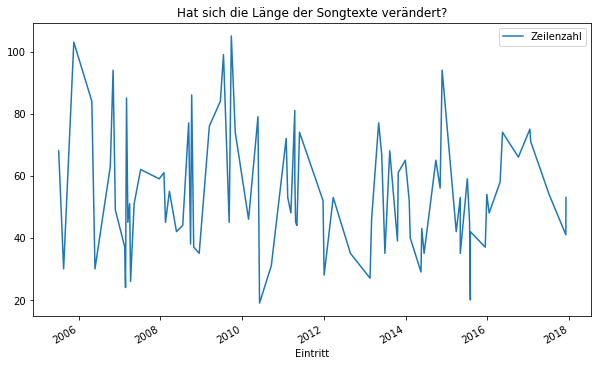

In [20]:
df_temp = df[(df['Eintritt'].dt.year >= 2005) & (df['Zeilenzahl'] != 0)]
df_temp.plot(x='Eintritt', y='Zeilenzahl', figsize=(10,6), title="Hat sich die Länge der Songtexte verändert?")

## Analyse über mehrere Datenfelder

Pandas `apply()` kann nicht nur verwendet werden, um die Elemente einer Series zu verarbeiten, sondern auch um eine Funktion zeilenweise auf ein Dataframe anzuwenden. Das ist nötig, sobald wir Inputs aus mehreren Spalten brauchen.

Zum Beispiel die Frage: Wie oft kommt der Songtitel im Songtext vor?

### Funktion schreiben

Wir brauchen eine Funktion:
- mit einem Input: Die ganze Tabellenzeile *als Series bzw. Dictionary*
- mit einem Output: Anzazhl Repetitionen
- Achtung auf Sonderzeichen im Titel!

In [21]:
def wiederholungen(row):
    
    # Zuerst erstellen wir eine Liste von Sonderzeichen
    sonderzeichen = ['!', '"', '&', "'", '(', ')', '–', '.', '?']
    
    # Wir entfernen diese Sonderzeichen aus dem Titel und Text
    bereinigter_titel = row['Titel']
    bereinigter_text = row['Songtext']

    for zeichen in sonderzeichen:
        bereinigter_titel = bereinigter_titel.replace(zeichen, "")
        bereinigter_text = bereinigter_text.replace(zeichen, "")
        
    # Jetzt können wir die Zählung starten

    wiederholungen = bereinigter_text.count(bereinigter_titel)
    
    return wiederholungen

### Funktion Testen

In [22]:
titel = "Ho! Ho! Ho!"

In [23]:
songtext = '''
Dies ist das Lied vom Weihnachtsmann
Ho Ho Ho
Der Weihnachtsmann kommt an Weihnachten
Ho Ho Ho
Kommt der Weihnachtsmann an Weihnachten?
Ho? Ho? Ho?
Ja er kommt an Weihnachten
Ho Ho Ho
'''

In [24]:
row = {
    'Titel': titel,
    'Songtext': songtext
}

In [25]:
wiederholungen(row)

4

### Funktion anwenden

Das lässige ist: Die Funktion weiss jetzt automatisch, welche Spalte es sich rauspicken muss.

Mit `apply()` wenden wir nun die Funktio `wiederholungen()` auf jede Zeile in unserem `df` an.

Achtung auf Parameter `axis=1`!

In [26]:
df.apply(wiederholungen, axis=1)

0     0
1     0
2     6
3     0
4     0
     ..
95    3
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

Das Ergebnis können wir wiederum speichern...

In [27]:
df['Wiederholungen'] = df.apply(wiederholungen, axis=1)

Wie sieht das aus?

In [28]:
df['Wiederholungen'].value_counts()

0     85
6      3
5      2
1      1
2      1
3      1
4      1
8      1
10     1
12     1
15     1
22     1
29     1
Name: Wiederholungen, dtype: int64

In [29]:
df.sort_values('Wiederholungen', ascending=False).head(2)

,Rang,Artist,Titel,Eintritt,Wochen,Peak,Punkte,Link,Songtext,Zeilenzahl,Wiederholungen
52,53,Mark Ronson feat. Bruno Mars,Uptown Funk!,2014-11-23,65,2,4498,/song/Mark-Ronson-feat.-Bruno-Mars/Uptown-Funk!-1355997,"This hit\nThat ice cold\nMichelle Pfeiffer\nThat white gold\nThis one, for them hood girls\nThem good girls\nStraight masterpieces\nStylin', while in\nLivin' it up in the city\nGot Chucks on with Saint Laurent\nGot kiss myself I'm so pretty\n\nI'm too hot (hot damn)\nCalled a police and a fireman\nI'm too hot (hot damn)\nMake a dragon wanna retire man\nI'm too hot (hot damn)\nSay my name you know who I am\nI'm too hot (hot damn)\nAm I bad 'bout that money\nBreak it down\n\nGirls hit your hallelujah (whuoo)\nGirls hit your hallelujah (whuoo)\nGirls hit your hallelujah (whuoo)\n'Cause Uptown Funk gon' give it to you\n'Cause Uptown Funk gon' give it to you\n'Cause Uptown Funk gon' give it to you\nSaturday night and we in the spot\nDon't believe me just watch (come on)\nDon't believe me just watch\nDon't believe me just watch\nDon't believe me just watch\nDon't believe me just watch\nDon't believe me just watch\nHey, hey, hey, oh!\n\nStop\nWait a minute\nFill my cup put some liquor in it\nTake a sip, sign a check\nJulio! Get the stretch!\nRide to Harlem, Hollywood, Jackson, Mississippi\nIf we show up, we gon' show out\nSmoother than a fresh jar of skippy\n\nI'm too hot (hot damn)\nCalled a police and a fireman\nI'm too hot (hot damn)\nMake a dragon wanna retire man\nI'm too hot (hot damn) (hot damn)\nBitch, say my name you know who I am\nI'm too hot (hot damn)\nAm I bad 'bout that money\nBreak it down\n\nGirls hit your hallelujah (whuoo)\nGirls hit your hallelujah (whuoo)\nGirls hit your hallelujah (whuoo)\n'Cause Uptown Funk gon' give it to you\n'Cause Uptown Funk gon' give it to you\n'Cause Uptown Funk gon' give it to you\nSaturday night and we in the spot\nDon't believe me just watch (come on)\nDon't believe me just watch\nDon't believe me just watch\nDon't believe me just watch\nDon't believe me just watch\nDon't believe me just watch\nHey, hey, hey, oh!\n\nBefore we leave\nImma tell y'all a lil' something\nUptown Funk you up, Uptown Funk you up\nUptown Funk you...",94,29
85,86,Imagine Dragons,Thunder,2017-07-05,54,2,3993,/song/Imagine-Dragons/Thunder-1656195,"Just a young gun with a quick fuse\nI was uptight, wanna let loose\nI was dreaming of bigger things\nAnd wanna leave my own life behind\nNot a yes sir, not a follower\nFit the box, fit the mold\nHave a seat in the foyer, take a number\nI was lightning before the thunder\n\nThunder, thunder\nThunder, thun-, thunder\nThun-thun-thunder, thunder, thunder\nThunder, thun-, thunder\nThun-thun-thunder, thunder\n\nThunder, feel the thunder\nLightning and the thunder\nThunder, feel the thunder\nLightning and the thunder\nThunder, thunder\nThunder\n\nKids were laughing in my classes\nWhile I was scheming for the masses\nWho do you think you are?\nDreaming 'bout being a big star\nYou say you're basic, you say you're easy\nYou're always riding in the back seat\nNow I'm smiling from the stage while\nYou were clapping in the nose bleeds\n\nThunder, thunder\nThunder, thun-, thunder\nThun-thun-thunder, thunder, thunder\nThunder, thun-, thunder\nThun-thun-thunder, thunder\n\nThunder, feel the thunder\nLightning and the thunder\nThunder, feel the thunder\nLightning and the thunder\nThunder\n\nThunder, feel the thunder\nLightning and the thunder, thunder\n\nThunder, feel the thunder\nLightning and the thunder, thunder\nThunder, feel the thunder\nLightning and the thunder, thunder\nThunder, feel the thunder\nLightning and the thunder, thunder\nThunder, feel the thunder (feel the)\nLightning and the thunder, thunder\n\nThunder, thunder, thunder\nThun-thun-thunder, thunder\nThunder, thunder, thunder\nThun-thun-thunder, thunder\nThunder, thunder, thunder\nThun-thun-thunder, thunder\nThunder, thunder, thunder\nThun-thun-thunder, thunder",54,22


Sind Songs mit vielen Titel-Wiederholungen besonders erfolgreich?

<AxesSubplot:xlabel='Wiederholungen'>

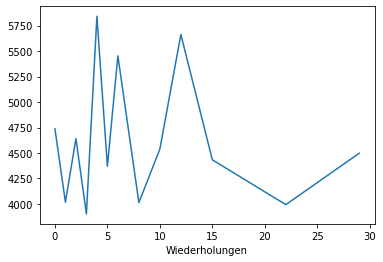

In [30]:
df.groupby('Wiederholungen')['Punkte'].mean().plot()

## Analyse über mehrere Datenfelder (mit Lambda)

Manchmal müssen wir eine Funktion auch auf andere Weise aufrufen. ZB dann, wenn sie von extern importiert wurde oder nicht eine Series als Input benötigt, sondern einzelne Variablen.

Das wäre zB hier der Fall. Statt so...

In [31]:
def wiederholungen(row):
    ...

... sieht das nun so aus:

In [32]:
def wiederholungen(titel, songtext):
    
    # Zuerst erstellen wir eine Liste von Sonderzeichen
    sonderzeichen = ['!', '"', '&', "'", '(', ')', '–', '.', '?']
    
    # Wir entfernen diese Sonderzeichen aus dem Titel und Text
    bereinigter_titel = titel # <= VORHER: row['Titel']
    bereinigter_text = songtext # <= VORHER: row['Songtext']

    for zeichen in sonderzeichen:
        bereinigter_titel = bereinigter_titel.replace(zeichen, "")
        bereinigter_text = bereinigter_text.replace(zeichen, "")
        
    # Jetzt können wir die Zählung starten

    wiederholungen = bereinigter_text.count(bereinigter_titel)
    
    return wiederholungen

Um diese Funktion zu benutzen, müssen wir mit dem Keyword `lambda` arbeiten.

In [33]:
df.apply(lambda row: wiederholungen(row['Titel'], row['Songtext']), axis=1)

0     0
1     0
2     6
3     0
4     0
     ..
95    3
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

Lambda-Funktionen sehen auf den ersten Blick kompliziert aus, sind aber keine Hexerei.

Erklärung siehe zB hier: https://www.programiz.com/python-programming/anonymous-function

Im wesentlichen sind es Funktionen, die on-the-fly definiert und ausgeführt werden, aber ohne dass sie einen Namen erhalten.

In [34]:
lambda x: x + 1

<function __main__.<lambda>(x)>

In [35]:
(lambda x: x + 1)(5)

6